In [2]:
#importando bibliotecas de analise
import pandas as pd
import numpy as np
import sidetable as stb

#importando as bibliotecas visualizacao
import matplotlib.pyplot as plt
import seaborn as sns

#importando bibliotecas de avaliacao de modelos

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

#importando warnings
import warnings
warnings.filterwarnings('ignore')


Funcao para criarmos as colunas adicionais de
* tendencia
* Tendencia	
* Soma_Acumulada	
* Desvio_pradrao_acumulado	
* desvio_padrao_movel	
* mediaacumulada	
* limite_superior(bollinger)	
* limite_inferio ( bollinger)
1.  Banda de Bollinger determina o quanto que seu modelo pode oscilar acima da media ou abaixo da media movel.
* calculado atraves da Media Movel - (desvio padrao movel* desvio padrao)
* std_num=determinar o desvio padrao de 0 a 3
* df["limite_superior"]=df["Tendencia"]+(df["desvio_padrao_movel"]*std_num)
* df["limite_inferior"]=df["Tendencia"]-(df["desvio_padrao_movel"]*std_num)

In [3]:
#argumento 1->dataset, argumento 2->quantos meses voce quer saltar
def valores(df:pd.DataFrame,s=int,n=int)->pd.DataFrame:
    std=s
    df["media_movel"]=df["Vendas"].rolling(n).mean()
    df["soma_acumulada"]=df["Vendas"].rolling(n).sum()
    df["desvio_padrao_medio"]=df["Vendas"].rolling(n).std()
    df["media_acumulada"]=df["Vendas"].expanding().mean()
    df["desvio_padrao_acumulada"]=df["Vendas"].expanding().std() 
    df["limite_inferior"]=df["media_movel"] - (df["desvio_padrao_medio"]*s)
    df["limite_superior"]=df["media_movel"] + (df["desvio_padrao_medio"]*s)
    return df

In [4]:


# DataFrame do ano atual
data_ano_atual = {
    'Data': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
    'Vendas': [1000, 1500, 1200, 1800, 2000, 2500, 3000, 2800, 2200, 1800, 1500, 1200]
}

# DataFrame para o ano de 2020 (usar para comparar com o= ano atual)
data_2020 = {
    'Data': ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
    'Vendas': [800, 1200, 900, 1500, 1800, 2000, 2500, 2300, 1900, 1500, 1200, 1000]
}

# DataFrame para o ano de 2021(usar para comparar com o ano atual)
data_2021 = {
    'Data': ['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
    'Vendas': [900, 1300, 1000, 1600, 1900, 2200, 2600, 2400, 2000, 1700, 1400, 1100]
}

# DataFrame para o ano de 2022(usar para comparar com o ano atual)
data_2022 = {
    'Data': ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
    'Vendas': [1000, 1500, 1200, 1800, 2000, 2500, 3000, 2800, 2200, 1800, 1500, 1200]
}

# Criando os DataFrames
df_2023 = pd.DataFrame(data_ano_atual)
df_2020 = pd.DataFrame(data_2020)
df_2021 = pd.DataFrame(data_2021)
df_2022 = pd.DataFrame(data_2022)

# Concatenando os DataFrames dos quatro anos
df_total= pd.concat([df_2020, df_2021, df_2022, df_2023], ignore_index=True)

df_total.head()


,Data,Vendas
0,2020-01-01,800
1,2020-02-01,1200
2,2020-03-01,900
3,2020-04-01,1500
4,2020-05-01,1800


In [5]:
#atribuindo o dataset novo como dftotal
dftotal=df_total.copy()

In [6]:
#transformando a coluna data para Datetime 
#ou pode ser trasformado atraves de pd.to_timedelta(df["Data"])
dftotal["Data"]=dftotal["Data"].astype("datetime64[ns]")

In [7]:
#colocando data como INDICE 
dftotal.set_index("Data", inplace=True)

In [8]:
#entendendo o tipo de variaveis que esstamos trabalhando
dftotal.dtypes

Vendas    int64
dtype: object

In [9]:
dftotal.head()

,Vendas
Data,
2020-01-01,800
2020-02-01,1200
2020-03-01,900
2020-04-01,1500
2020-05-01,1800


In [10]:
#extraindo o valor adfuller
resultado=adfuller(dftotal["Vendas"].dropna())
resultado


(-1.2923738544808532,
 0.6326540221651398,
 9,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 516.1733997104827)

In [11]:
# extraindo o valor kpss
kpss(dftotal)

(0.1623780160033854,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [12]:
#usando a funcao para criarmos as colunas necessarias para analisar nossa serie temporal
valores(dftotal,1,2).head()

,Vendas,media_movel,soma_acumulada,desvio_padrao_medio,media_acumulada,desvio_padrao_acumulada,limite_inferior,limite_superior
Data,,,,,,,,
2020-01-01,800,NaN,NaN,NaN,800.000000,NaN,NaN,NaN
2020-02-01,1200,1000.0,2000.0,282.842712,1000.000000,282.842712,717.157288,1282.842712
2020-03-01,900,1050.0,2100.0,212.132034,966.666667,208.166600,837.867966,1262.132034
2020-04-01,1500,1200.0,2400.0,424.264069,1100.000000,316.227766,775.735931,1624.264069
2020-05-01,1800,1650.0,3300.0,212.132034,1240.000000,415.932687,1437.867966,1862.132034


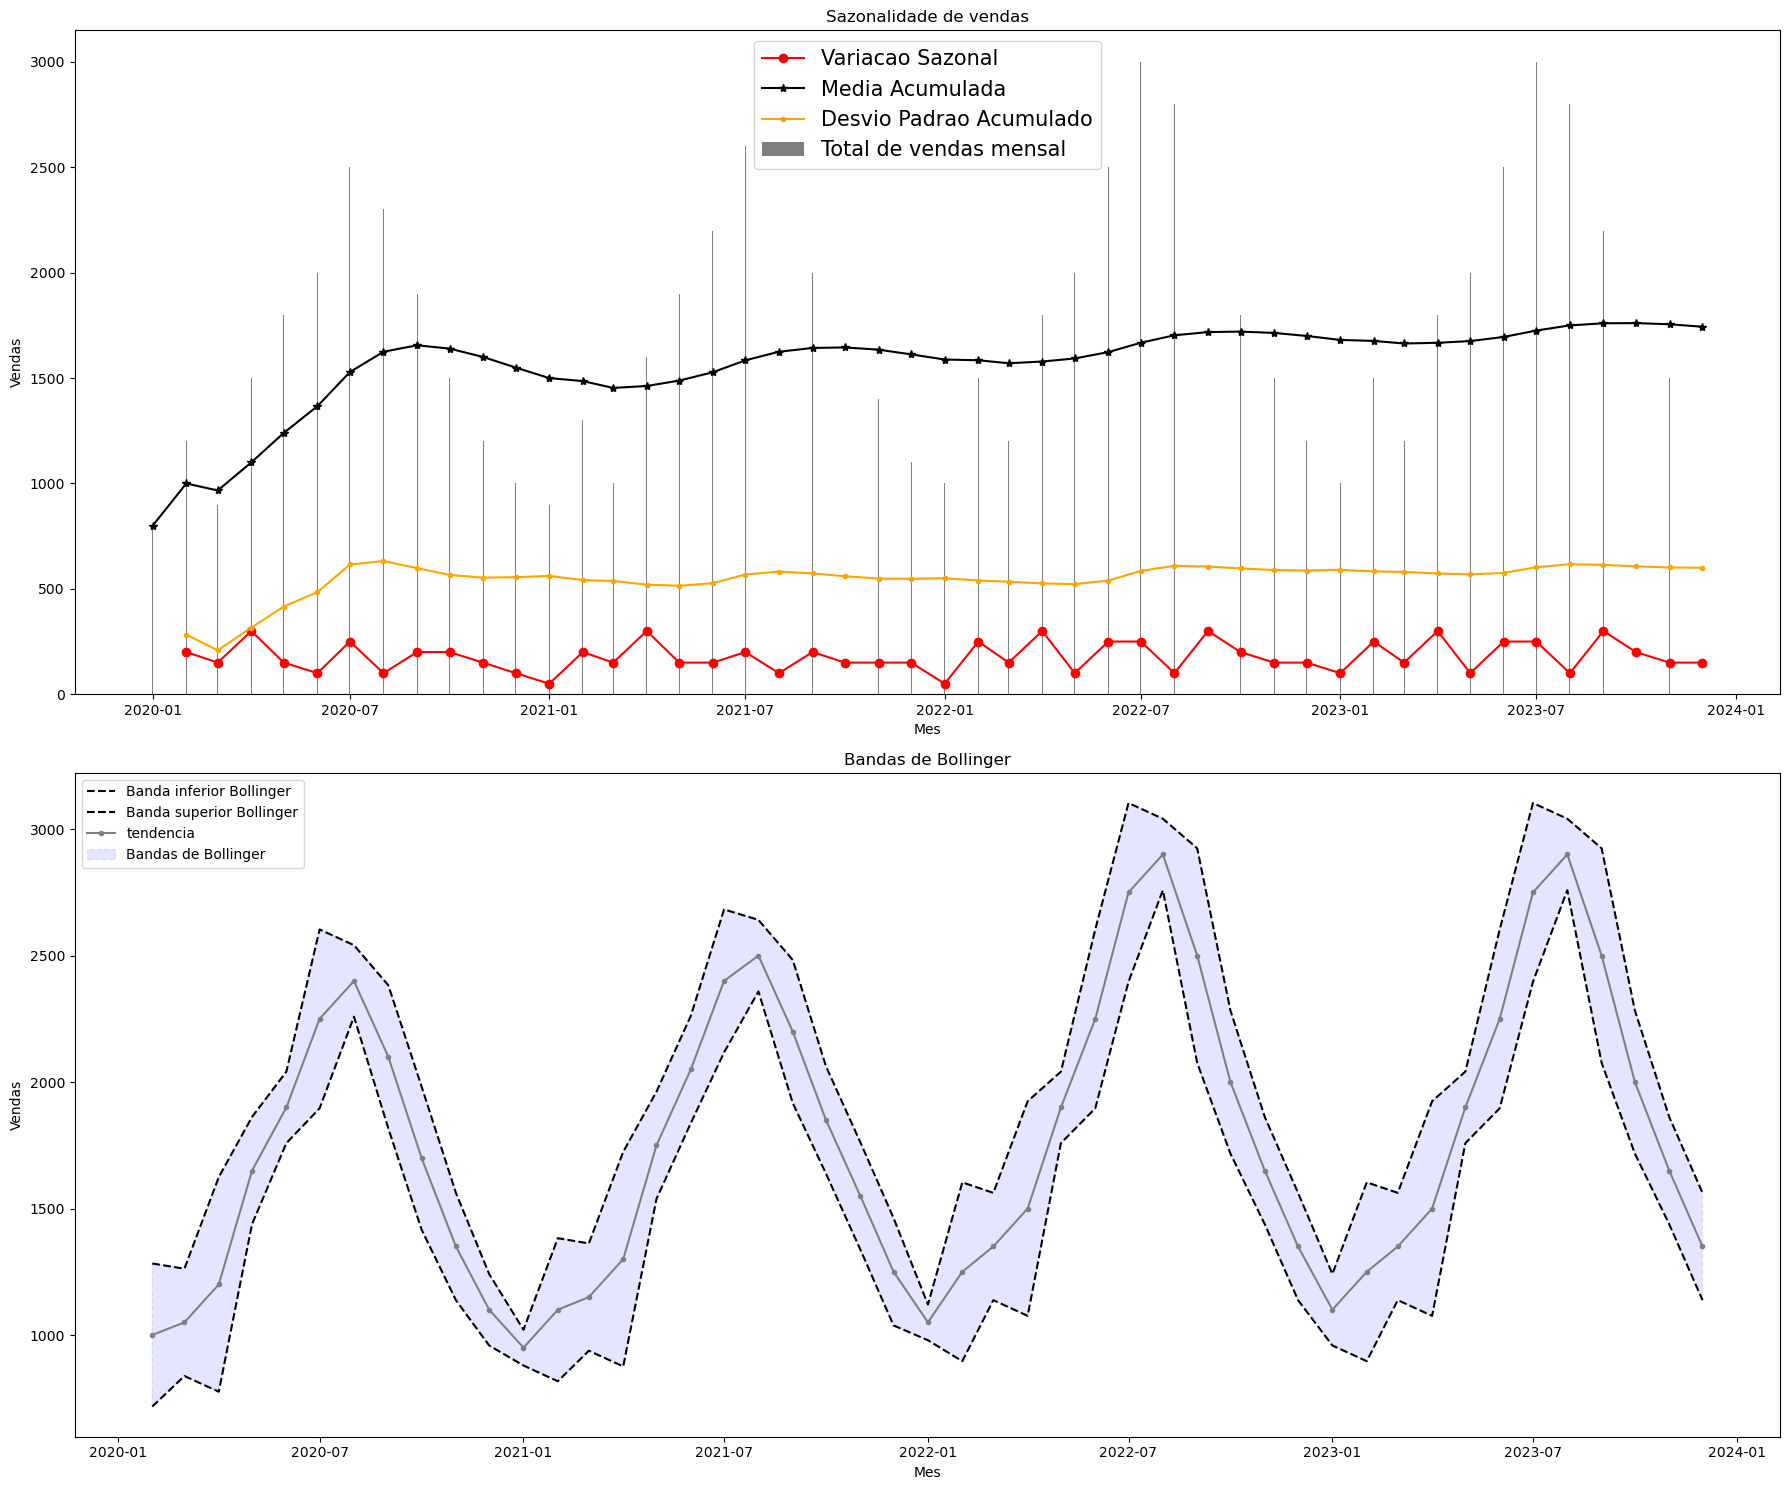

In [13]:
#plotando o grafico das referencias de serie temporal

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 15))

#plotando grafico de barras dos 

ax1.bar(dftotal.index, dftotal["Vendas"], align="center",alpha=0.5, color="black", 
        label="Total de vendas mensal")

#plotando variacao sazonal

ax1.plot(dftotal.index, abs(dftotal["Vendas"]-dftotal["media_movel"]),
         marker="o", color="red",label="Variacao Sazonal")

#Plotando media acumulada

ax1.plot(dftotal.index, dftotal["media_acumulada"], marker="*", color="black", label="Media Acumulada")

#plotando desvio padrao acumulado

ax1.plot(dftotal.index, dftotal["desvio_padrao_acumulada"], 
         marker=".", color="orange", label="Desvio Padrao Acumulado")
#Set tilte

ax1.set_title("Sazonalidade de vendas")

########----------------------------------------------------------------------------------------

#plotando a banda de bollinger

ax2.plot(dftotal.index, dftotal["limite_inferior"],linestyle="--",color="Black", 
         label="Banda inferior Bollinger")
ax2.plot(dftotal.index, dftotal["limite_superior"],linestyle="--",color="Black", 
         label="Banda superior Bollinger")
ax2.plot(dftotal.index, dftotal["media_movel"], marker=".", color="gray", label="tendencia")

#preenchendo entre os limites da banda
ax2.fill_between(dftotal.index, dftotal['limite_superior'], dftotal['limite_inferior'], 
                alpha=0.1, color = 'blue', linestyle = '--', label='Bandas de Bollinger')
#Set title

ax2.set_title("Bandas de Bollinger")

#Configurando os nomes dos eixos X, Y do grafico 1 e grafico 2

ax1.set_xlabel("Mes")
ax1.set_ylabel("Vendas")
ax1.legend(fontsize=15)
ax2.set_xlabel("Mes")
ax2.set_ylabel("Vendas")
ax2.legend(fontsize=15)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

* comparando  as linhas de tendencia, sazonalidade e aleatorideade

In [14]:
''' usando o seasonal decompose na coluna vendas para gerarmos as 
linhas de tendencia,sazonalidade e aleatorideade'''
decompose=seasonal_decompose(dftotal["Vendas"])


In [15]:
trend=decompose.trend
seasonal=decompose.seasonal
resid=decompose.resid

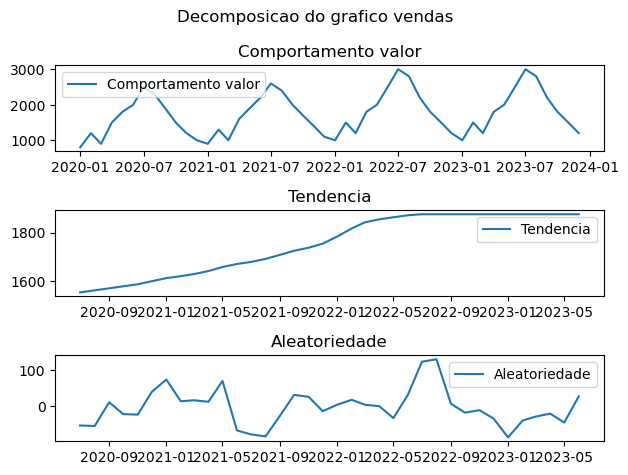

In [16]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Decomposicao do grafico vendas")
ax1 = fig.add_subplot(3,1,1)
plt.plot(dftotal["Vendas"], label="Comportamento valor")
plt.legend(loc="best")
ax1.title.set_text("Comportamento valor")
ax2 = fig.add_subplot(3,1,2)
plt.plot(trend, label="Tendencia")
plt.legend(loc="best")
ax2.title.set_text("Tendencia")
ax3 = fig.add_subplot(3,1,3)
plt.plot(resid, label="Aleatoriedade")
plt.legend(loc="best")
ax3.title.set_text("Aleatoriedade")

plt.tight_layout()

* Entendendo como esta sendo o ano de 2023

In [54]:
#atribuindo o dataset do ano de 2023 para df
# Dados de exemplo
df = df_2023.copy()

# Criar DataFrame
df['Data'] = pd.to_datetime(df['Data'])
df = df.set_index('Data')

Repetindo o processo dos dados dos ultimos 3 anos para apenas 2023 para entendermos como esta a caracterista desse ano

In [55]:
#criando as colunas adicionais

valores(df,1, 2)

,Vendas,media_movel,soma_acumulada,desvio_padrao_medio,media_acumulada,desvio_padrao_acumulada,limite_inferior,limite_superior
Data,,,,,,,,
2023-01-01,1000,NaN,NaN,NaN,1000.000000,NaN,NaN,NaN
2023-02-01,1500,1250.0,2500.0,353.553391,1250.000000,353.553391,896.446609,1603.553391
2023-03-01,1200,1350.0,2700.0,212.132034,1233.333333,251.661148,1137.867966,1562.132034
2023-04-01,1800,1500.0,3000.0,424.264069,1375.000000,350.000000,1075.735931,1924.264069
2023-05-01,2000,1900.0,3800.0,141.421356,1500.000000,412.310563,1758.578644,2041.421356
2023-06-01,2500,2250.0,4500.0,353.553391,1666.666667,550.151494,1896.446609,2603.553391
2023-07-01,3000,2750.0,5500.0,353.553391,1857.142857,711.470643,2396.446609,3103.553391
2023-08-01,2800,2900.0,5800.0,141.421356,1975.000000,738.241153,2758.578644,3041.421356
2023-09-01,2200,2500.0,5000.0,424.264069,2000.000000,694.622199,2075.735931,2924.264069


In [56]:
#analisando se o index foi corretamente trasnformado
df.index.dtype

dtype('<M8[ns]')

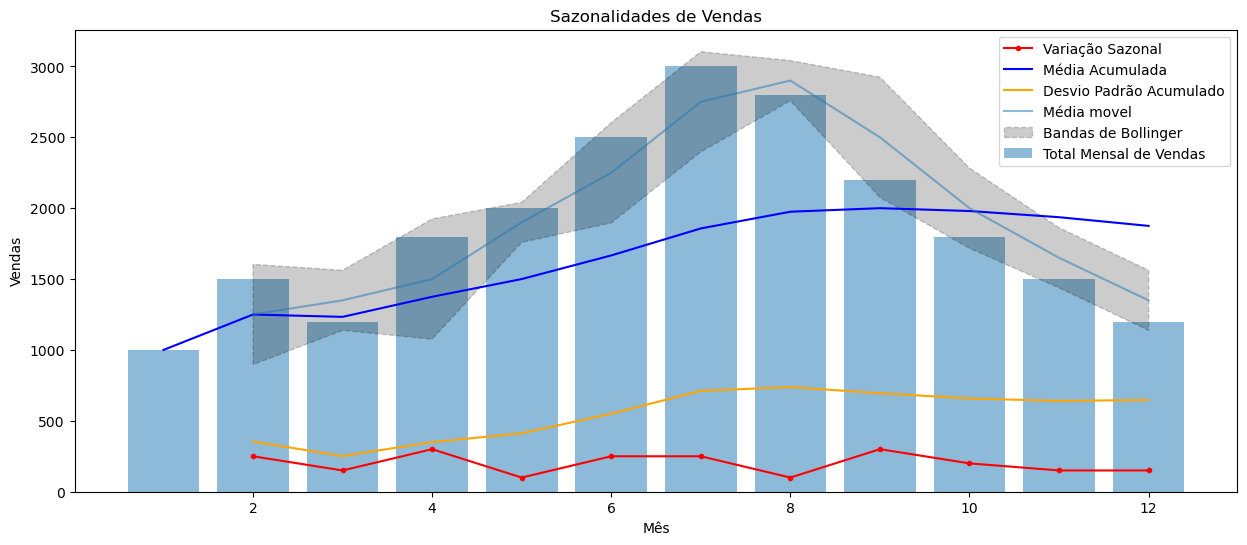

In [61]:
#plotando o grafico das referencias de serie temporal

# Plotar o gráfico
plt.figure(figsize=(15, 6))


# Plotar as vendas mensais
plt.bar(df.index.month, df['Vendas'], align='center', alpha=0.5, label='Total Mensal de Vendas')

# Plotar a variação sazonal
plt.plot(df.index.month, abs(df['Vendas'] - df['media_movel']), marker='.', 
         color='red', label='Variação Sazonal')

# Plotar a média acumulada
plt.plot(df.index.month, df['media_acumulada'], linestyle='-', color='blue', label='Média Acumulada')

# Plotar o desvio padrão acumulado
plt.plot(df.index.month, df['desvio_padrao_acumulada'], linestyle='-', 
         color='orange', label='Desvio Padrão Acumulado')

# Plotar as vendas mensais
plt.plot(df.index.month, df['media_movel'], alpha=0.5, label='Média movel')

# Bandas de bollinger
plt.fill_between(df.index.month, df['limite_superior'], df['limite_inferior'], 
                alpha=0.2, color = 'black', linestyle = '--', label='Bandas de Bollinger')

plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Sazonalidades de Vendas')
plt.legend()
plt.show()